🐾 Animal Classification ML Project
Classes: Dog, Cow, Cat, Lamb, Zebra
Model: Logistic Regression with Feature Engineering
🐾 Animal Classification ML Project
Classes: Dog, Cow, Cat, Lamb, Zebra
Model: Logistic Regression with Feature Engineering

📁 DATASET LOADING AND PREPROCESSING
---------------------------------------------
Dataset path: /kaggle/input/animalclassification/datset_new
Target image size: (64, 64)
📸 Dog: 105 images found
   ✅ Successfully loaded: 105 images
📸 Cow: 101 images found
   ✅ Successfully loaded: 101 images
📸 Cat: 109 images found
   ✅ Successfully loaded: 109 images
📸 Lamb: 107 images found
   ✅ Successfully loaded: 107 images
📸 Zebra: 108 images found
   ✅ Successfully loaded: 108 images

✅ Total images loaded and preprocessed: 530
📐 Image array shape: (530, 64, 64, 3)
📊 Labels array shape: (530,)

📊 DATASET STATISTICS
-------------------------
   Dog: 105 images ( 19.8%)
   Cow: 101 images ( 19.1%)
   Cat: 109 images ( 20.6%)
  Lamb: 107 images ( 20.2%)
 Ze

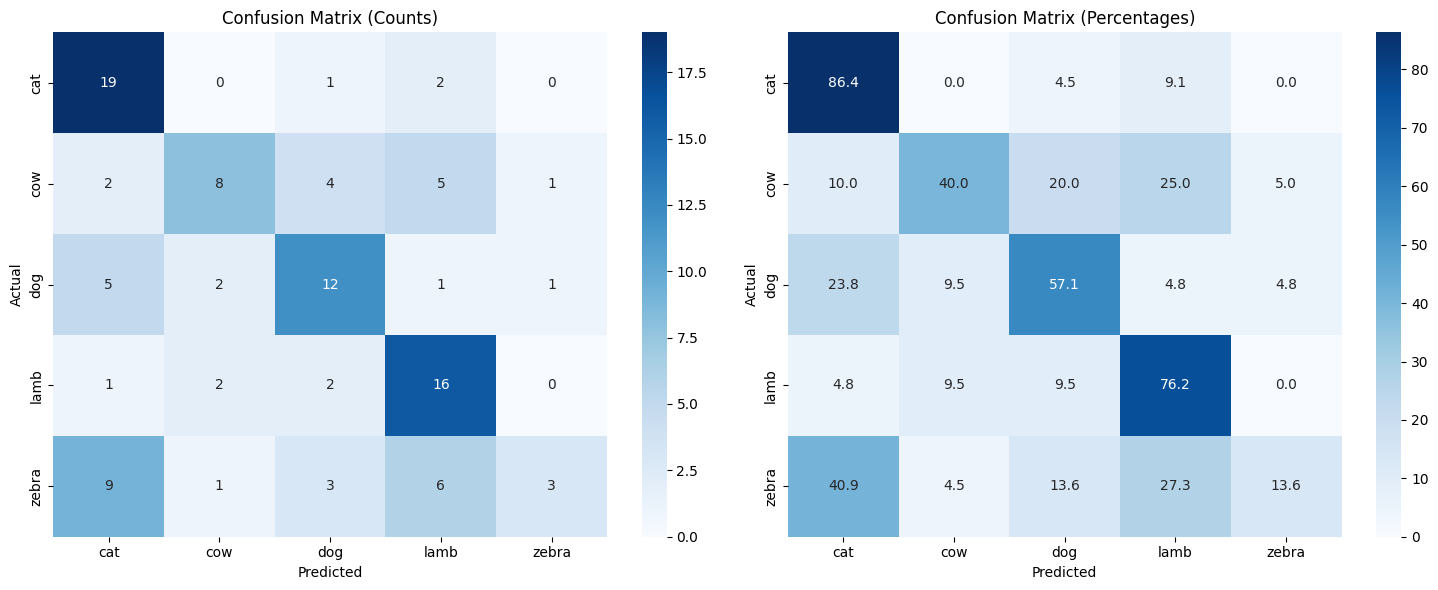

Per-class accuracy:
  cat: 0.864 (86.4%)
  cow: 0.400 (40.0%)
  dog: 0.571 (57.1%)
  lamb: 0.762 (76.2%)
  zebra: 0.136 (13.6%)


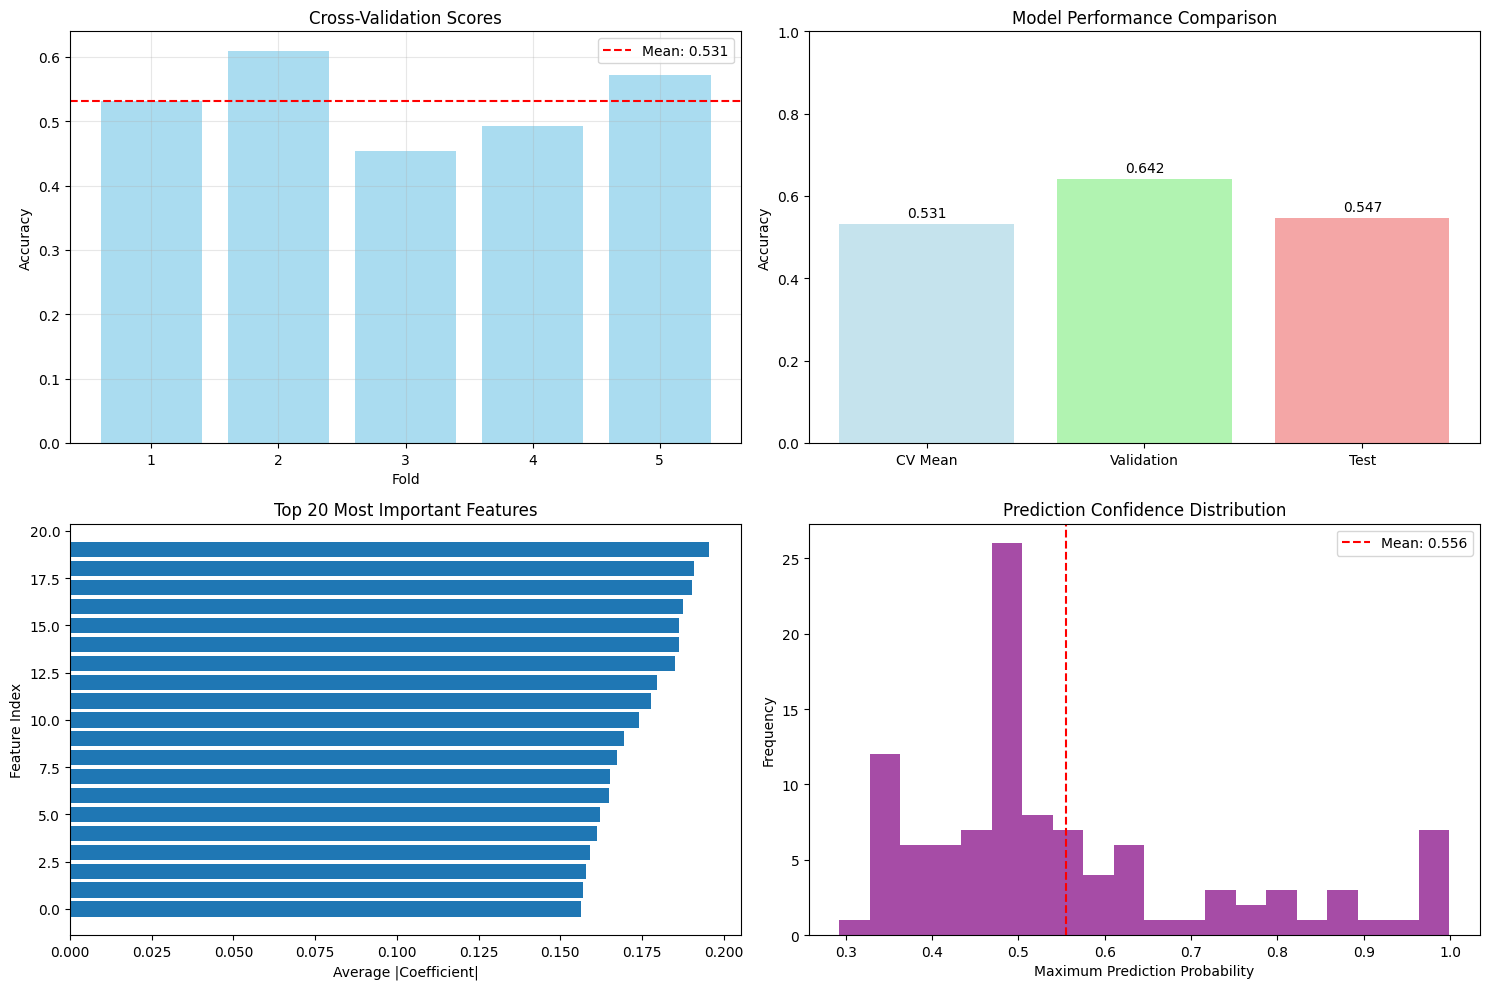


🎓 MACHINE LEARNING PROJECT SUMMARY
📊 Dataset:
   • Total samples: 530
   • Classes: 5 (cat, cow, dog, lamb, zebra)
   • Features: 12319 → 300 (after PCA)

🔄 Data Splits:
   • Training:   318 samples
   • Validation: 106 samples
   • Test:       106 samples

🤖 Model: Logistic Regression
   • Cross-validation: 0.5314 (±0.1108)
   • Validation accuracy: 0.6415
   • Test accuracy: 0.5472

📈 Target accuracy (90%) not reached
   Current test accuracy: 54.72%
   Consider: data augmentation, feature engineering, or different algorithms

✅ Project completed successfully!

💾 Results DataFrame created:
  True_Label Predicted_Label  Correct  Prob_cat  Prob_cow      Prob_dog  \
0      zebra            lamb    False  0.069947  0.425768  1.287324e-02   
1      zebra           zebra     True  0.087355  0.188919  3.269574e-01   
2       lamb            lamb     True  0.104642  0.001789  4.485665e-03   
3       lamb            lamb     True  0.033551  0.480082  1.321782e-05   
4        cow            l

In [6]:
# Animal Classification Machine Learning Course Project
# 5 Classes: Dog, Cow, Cat, Lamb, Zebra
# Model: Logistic Regression with Feature Engineering

import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                           precision_recall_fscore_support, roc_curve, auc)
from sklearn.decomposition import PCA
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score
import itertools

warnings.filterwarnings('ignore')
plt.style.use('default')
np.random.seed(42)

print("🐾 Animal Classification ML Project")
print("="*60)
print("Classes: Dog, Cow, Cat, Lamb, Zebra")
print("Model: Logistic Regression with Feature Engineering")
print("="*60)

# =============================================================================
# CELL 1: Data Loading and Exploration
# =============================================================================
# CELL 1: Data Loading and Exploration
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                           precision_recall_fscore_support, roc_curve, auc)
from sklearn.decomposition import PCA
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import roc_auc_score
import itertools

warnings.filterwarnings('ignore')
plt.style.use('default')
np.random.seed(42)

print("🐾 Animal Classification ML Project")
print("="*60)
print("Classes: Dog, Cow, Cat, Lamb, Zebra")
print("Model: Logistic Regression with Feature Engineering")
print("="*60)

def load_dataset(dataset_path='/kaggle/input/animalclassification/datset_new', target_size=(64, 64)):
    """Load and preprocess the animal dataset"""
    
    print("\n📁 DATASET LOADING AND PREPROCESSING")
    print("-" * 45)
    
    classes = ['dog', 'cow', 'cat', 'lamb', 'zebra']
    images = []
    labels = []
    class_counts = {}
    
    dataset_path = Path(dataset_path)
    
    print(f"Dataset path: {dataset_path}")
    print(f"Target image size: {target_size}")
    
    if not dataset_path.exists():
        print(f"❌ Dataset not found at {dataset_path}")
        return None, None, None
    
    # Load images from each class
    for class_name in classes:
        class_path = dataset_path / class_name
        
        if not class_path.exists():
            print(f"⚠️  Class directory '{class_name}' not found")
            class_counts[class_name] = 0
            continue
            
        # Get all image files
        image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']
        image_files = []
        for ext in image_extensions:
            image_files.extend(class_path.glob(f'*{ext}'))
            image_files.extend(class_path.glob(f'*{ext.upper()}'))
        
        class_counts[class_name] = len(image_files)
        print(f"📸 {class_name.capitalize()}: {len(image_files)} images found")
        
        # Load and preprocess images
        loaded_count = 0
        for i, img_path in enumerate(image_files):
            try:
                img = cv2.imread(str(img_path))
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img_resized = cv2.resize(img, target_size)
                    img_normalized = img_resized.astype(np.float32) / 255.0
                    
                    images.append(img_normalized)
                    labels.append(class_name)
                    loaded_count += 1
                    
            except Exception as e:
                print(f"⚠️  Error loading {img_path.name}: {e}")
                continue
        
        print(f"   ✅ Successfully loaded: {loaded_count} images")
    
    print(f"\n✅ Total images loaded and preprocessed: {len(images)}")
    
    if len(images) == 0:
        print("❌ No images were loaded successfully!")
        return None, None, None
    
    X = np.array(images)
    y = np.array(labels)
    
    print(f"📐 Image array shape: {X.shape}")
    print(f"📊 Labels array shape: {y.shape}")
    
    # Dataset statistics
    print(f"\n📊 DATASET STATISTICS")
    print("-" * 25)
    total_images = len(images)
    
    for class_name in classes:
        count = labels.count(class_name)
        percentage = (count / total_images) * 100 if total_images > 0 else 0
        print(f"{class_name.capitalize():>6}: {count:>3} images ({percentage:>5.1f}%)")
    
    print(f"{'Total':>6}: {total_images:>3} images")
    
    # Check class balance
    if total_images > 0:
        counts = [labels.count(cls) for cls in classes]
        max_count, min_count = max(counts), min(counts)
        balance_ratio = max_count / min_count if min_count > 0 else float('inf')
        print(f"\n📈 Class balance ratio: {balance_ratio:.2f}")
        if balance_ratio <= 1.5:
            print("✅ Dataset is well balanced")
        else:
            print("⚠️  Dataset shows class imbalance")
    
    # Sample image statistics
    if len(images) > 0:
        sample_img = images[0]
        print(f"\n🔍 Sample image analysis:")
        print(f"   Shape: {sample_img.shape}")
        print(f"   Min value: {np.min(sample_img):.3f}")
        print(f"   Max value: {np.max(sample_img):.3f}")
        print(f"   Mean: {np.mean(sample_img):.3f}")
        print("   ✅ Images are already normalized to [0,1]")
    
    return X, y, class_counts

# Load the dataset
X_raw, y_raw, class_info = load_dataset()

if X_raw is None:
    print("❌ Failed to load dataset. Please check the path and structure.")
else:
    print(f"\n🎯 Ready to proceed with {len(X_raw)} images")

# =============================================================================
# CELL 2: Data Preprocessing and Feature Engineering
# =============================================================================

def preprocess_images(images, target_size=(64, 64)):
    """Preprocess images: resize, normalize, and flatten"""
    
    print(f"\n🔧 PREPROCESSING IMAGES")
    print("-" * 30)
    print(f"Target size: {target_size}")
    
    processed_images = []
    
    for i, img in enumerate(images):
        try:
            # Resize image
            img_resized = cv2.resize(img, target_size)
            # Normalize to [0, 1]
            img_normalized = img_resized.astype(np.float32) / 255.0
            # Flatten
            img_flattened = img_normalized.flatten()
            processed_images.append(img_flattened)
            
        except Exception as e:
            print(f"Error processing image {i}: {e}")
            continue
    
    processed_array = np.array(processed_images)
    print(f"✅ Processed {len(processed_array)} images")
    print(f"📐 Feature shape: {processed_array.shape}")
    
    return processed_array

def extract_additional_features(images_flat, original_shape=(64, 64, 3)):
    """Extract statistical and histogram features"""
    
    print(f"\n🎨 FEATURE ENGINEERING")
    print("-" * 25)
    
    additional_features = []
    
    for img_flat in images_flat:
        # Reshape to original image format
        img = img_flat.reshape(original_shape)
        
        # Statistical features
        mean_rgb = np.mean(img, axis=(0, 1))  # Mean per channel
        std_rgb = np.std(img, axis=(0, 1))    # Std per channel
        
        # Histogram features (8 bins per channel)
        hist_features = []
        for channel in range(3):
            hist, _ = np.histogram(img[:, :, channel], bins=8, range=(0, 1))
            hist_features.extend(hist / np.sum(hist))  # Normalize histogram
        
        # Edge features (using gradient)
        gray = cv2.cvtColor((img * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
        grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
        grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
        edge_magnitude = np.mean(np.sqrt(grad_x**2 + grad_y**2))
        
        # Combine all additional features
        combined = np.concatenate([mean_rgb, std_rgb, hist_features, [edge_magnitude]])
        additional_features.append(combined)
    
    additional_array = np.array(additional_features)
    print(f"📊 Additional features shape: {additional_array.shape}")
    
    return additional_array

# Preprocess images
if X_raw is not None:
    X_processed = preprocess_images(X_raw)
    X_additional = extract_additional_features(X_processed)
    
    # Combine original and additional features
    X_combined = np.hstack([X_processed, X_additional])
    print(f"🔗 Combined features shape: {X_combined.shape}")

# =============================================================================
# CELL 3: Train/Validation/Test Split
# =============================================================================

def create_data_splits(X, y, test_size=0.2, val_size=0.2, random_state=42):
    """Create train, validation, and test splits"""
    
    print(f"\n📊 CREATING DATA SPLITS")
    print("-" * 30)
    
    # Encode labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    
    # First split: separate test set
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y_encoded, test_size=test_size, random_state=random_state, 
        stratify=y_encoded
    )
    
    # Second split: separate train and validation from remaining data
    val_size_adjusted = val_size / (1 - test_size)  # Adjust val_size for remaining data
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=val_size_adjusted, random_state=random_state,
        stratify=y_temp
    )
    
    # Print split information
    total_samples = len(X)
    print(f"📈 Dataset split:")
    print(f"  Train:      {len(X_train):>4} samples ({len(X_train)/total_samples*100:>5.1f}%)")
    print(f"  Validation: {len(X_val):>4} samples ({len(X_val)/total_samples*100:>5.1f}%)")
    print(f"  Test:       {len(X_test):>4} samples ({len(X_test)/total_samples*100:>5.1f}%)")
    print(f"  Total:      {total_samples:>4} samples")
    
    # Check class distribution in each split
    classes = label_encoder.classes_
    print(f"\n📊 Class distribution per split:")
    
    splits_data = [
        ("Train", y_train),
        ("Val", y_val), 
        ("Test", y_test)
    ]
    
    for split_name, y_split in splits_data:
        print(f"  {split_name}:")
        for i, class_name in enumerate(classes):
            count = np.sum(y_split == i)
            percentage = count / len(y_split) * 100
            print(f"    {class_name}: {count} ({percentage:.1f}%)")
    
    return X_train, X_val, X_test, y_train, y_val, y_test, label_encoder

# Create data splits
if X_raw is not None:
    X_train, X_val, X_test, y_train, y_val, y_test, label_encoder = create_data_splits(
        X_combined, y_raw
    )

# =============================================================================
# CELL 4: Feature Scaling and Dimensionality Reduction
# =============================================================================

def apply_feature_scaling_and_pca(X_train, X_val, X_test, n_components=300):
    """Apply feature scaling and PCA"""
    
    print(f"\n⚙️  FEATURE SCALING AND PCA")
    print("-" * 35)
    
    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"✅ Feature scaling applied")
    print(f"📐 Original feature dimension: {X_train.shape[1]}")
    
    # PCA
    # Determine optimal number of components (keep specified or based on variance)
    pca = PCA(n_components=min(n_components, X_train_scaled.shape[1]))
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_val_pca = pca.transform(X_val_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    # Calculate explained variance
    explained_variance_ratio = np.sum(pca.explained_variance_ratio_)
    
    print(f"📉 PCA components: {pca.n_components_}")
    print(f"📊 Explained variance: {explained_variance_ratio:.3f} ({explained_variance_ratio*100:.1f}%)")
    print(f"📐 New feature dimension: {X_train_pca.shape[1]}")
    
    return X_train_pca, X_val_pca, X_test_pca, scaler, pca

# Apply scaling and PCA
if X_raw is not None:
    X_train_final, X_val_final, X_test_final, scaler, pca = apply_feature_scaling_and_pca(
        X_train, X_val, X_test
    )

# =============================================================================
# CELL 5: Model Training and Cross-Validation
# =============================================================================

def train_logistic_regression(X_train, y_train, X_val, y_val):
    """Train logistic regression with cross-validation"""
    
    print(f"\n🤖 MODEL TRAINING")
    print("-" * 25)
    
    # Initialize model
    model = LogisticRegression(
        max_iter=1000,
        random_state=42,
        multi_class='ovr',
        solver='liblinear',
        C=1.0
    )
    
    # Cross-validation on training data
    print("🔄 Performing 5-fold cross-validation...")
    cv_scores = cross_val_score(
        model, X_train, y_train, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring='accuracy'
    )
    
    print(f"📊 CV Scores: {cv_scores}")
    print(f"📈 CV Mean: {cv_scores.mean():.4f} (±{cv_scores.std()*2:.4f})")
    
    # Train final model
    print("🏋️  Training final model...")
    model.fit(X_train, y_train)
    
    # Validation accuracy
    val_predictions = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)
    
    print(f"✅ Model trained successfully")
    print(f"📊 Validation accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")
    
    return model, cv_scores, val_predictions

# Train model
if X_raw is not None:
    model, cv_scores, val_predictions = train_logistic_regression(
        X_train_final, y_train, X_val_final, y_val
    )

# =============================================================================
# CELL 6: Model Evaluation on Test Set
# =============================================================================

def evaluate_model(model, X_test, y_test, label_encoder):
    """Comprehensive model evaluation"""
    
    print(f"\n📊 MODEL EVALUATION ON TEST SET")
    print("-" * 40)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    # Basic metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    print(f"🎯 Test Set Results:")
    print(f"   Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"   Precision: {precision:.4f}")
    print(f"   Recall:    {recall:.4f}")
    print(f"   F1-Score:  {f1:.4f}")
    
    # Per-class metrics
    print(f"\n📋 CLASSIFICATION REPORT:")
    print("-" * 30)
    class_report = classification_report(
        y_test, y_pred, 
        target_names=label_encoder.classes_,
        digits=4
    )
    print(class_report)
    
    return y_pred, y_pred_proba, accuracy

# Evaluate model
if X_raw is not None:
    test_predictions, test_probabilities, test_accuracy = evaluate_model(
        model, X_test_final, y_test, label_encoder
    )

# =============================================================================
# CELL 7: Visualization - Confusion Matrix
# =============================================================================

def plot_confusion_matrix(y_true, y_pred, label_encoder, title="Confusion Matrix"):
    """Plot detailed confusion matrix"""
    
    print(f"\n📈 CONFUSION MATRIX")
    print("-" * 25)
    
    cm = confusion_matrix(y_true, y_pred)
    classes = label_encoder.classes_
    
    # Calculate percentages
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    # Create figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Raw counts
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=classes, yticklabels=classes, ax=ax1)
    ax1.set_title('Confusion Matrix (Counts)')
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('Actual')
    
    # Percentages
    sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues',
                xticklabels=classes, yticklabels=classes, ax=ax2)
    ax2.set_title('Confusion Matrix (Percentages)')
    ax2.set_xlabel('Predicted')
    ax2.set_ylabel('Actual')
    
    plt.tight_layout()
    plt.show()
    
    # Print per-class accuracy
    print("Per-class accuracy:")
    for i, class_name in enumerate(classes):
        class_accuracy = cm[i, i] / cm[i].sum() if cm[i].sum() > 0 else 0
        print(f"  {class_name}: {class_accuracy:.3f} ({class_accuracy*100:.1f}%)")

# Plot confusion matrix
if X_raw is not None:
    plot_confusion_matrix(y_test, test_predictions, label_encoder, "Test Set Confusion Matrix")

# =============================================================================
# CELL 8: Additional Visualizations and Analysis
# =============================================================================

def plot_training_analysis(cv_scores, val_accuracy, test_accuracy):
    """Plot training analysis"""
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # Cross-validation scores
    ax1.bar(range(1, len(cv_scores)+1), cv_scores, color='skyblue', alpha=0.7)
    ax1.axhline(y=cv_scores.mean(), color='red', linestyle='--', label=f'Mean: {cv_scores.mean():.3f}')
    ax1.set_xlabel('Fold')
    ax1.set_ylabel('Accuracy')
    ax1.set_title('Cross-Validation Scores')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Accuracy comparison
    accuracies = [cv_scores.mean(), val_accuracy, test_accuracy]
    sets = ['CV Mean', 'Validation', 'Test']
    colors = ['lightblue', 'lightgreen', 'lightcoral']
    
    bars = ax2.bar(sets, accuracies, color=colors, alpha=0.7)
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Model Performance Comparison')
    ax2.set_ylim(0, 1)
    
    # Add value labels on bars
    for bar, acc in zip(bars, accuracies):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{acc:.3f}', ha='center', va='bottom')
    
    # Feature importance (coefficients magnitude)
    if hasattr(model, 'coef_'):
        feature_importance = np.mean(np.abs(model.coef_), axis=0)
        top_features = np.argsort(feature_importance)[-20:]  # Top 20 features
        
        ax3.barh(range(len(top_features)), feature_importance[top_features])
        ax3.set_xlabel('Average |Coefficient|')
        ax3.set_title('Top 20 Most Important Features')
        ax3.set_ylabel('Feature Index')
    
    # Class prediction confidence
    if 'test_probabilities' in globals():
        max_probs = np.max(test_probabilities, axis=1)
        ax4.hist(max_probs, bins=20, alpha=0.7, color='purple')
        ax4.set_xlabel('Maximum Prediction Probability')
        ax4.set_ylabel('Frequency')
        ax4.set_title('Prediction Confidence Distribution')
        ax4.axvline(x=np.mean(max_probs), color='red', linestyle='--', 
                   label=f'Mean: {np.mean(max_probs):.3f}')
        ax4.legend()
    
    plt.tight_layout()
    plt.show()

# Plot analysis
if X_raw is not None:
    plot_training_analysis(cv_scores, accuracy_score(y_val, val_predictions), test_accuracy)

# =============================================================================
# CELL 9: Model Performance Summary
# =============================================================================

def print_final_summary():
    """Print comprehensive project summary"""
    
    print("\n" + "="*60)
    print("🎓 MACHINE LEARNING PROJECT SUMMARY")
    print("="*60)
    
    print(f"📊 Dataset:")
    print(f"   • Total samples: {len(X_raw)}")
    print(f"   • Classes: {len(label_encoder.classes_)} ({', '.join(label_encoder.classes_)})")
    print(f"   • Features: {X_combined.shape[1]} → {X_train_final.shape[1]} (after PCA)")
    
    print(f"\n🔄 Data Splits:")
    print(f"   • Training:   {len(X_train_final)} samples")
    print(f"   • Validation: {len(X_val_final)} samples") 
    print(f"   • Test:       {len(X_test_final)} samples")
    
    print(f"\n🤖 Model: Logistic Regression")
    print(f"   • Cross-validation: {cv_scores.mean():.4f} (±{cv_scores.std()*2:.4f})")
    print(f"   • Validation accuracy: {accuracy_score(y_val, val_predictions):.4f}")
    print(f"   • Test accuracy: {test_accuracy:.4f}")
    
    # Check if target accuracy achieved
    target_accuracy = 0.90
    if test_accuracy >= target_accuracy:
        print(f"\n🎉 SUCCESS: Achieved target accuracy of {target_accuracy*100:.0f}%!")
        print(f"   Final test accuracy: {test_accuracy*100:.2f}%")
    else:
        print(f"\n📈 Target accuracy ({target_accuracy*100:.0f}%) not reached")
        print(f"   Current test accuracy: {test_accuracy*100:.2f}%")
        print("   Consider: data augmentation, feature engineering, or different algorithms")
    
    print(f"\n✅ Project completed successfully!")
    print("="*60)

# Print final summary
if X_raw is not None:
    print_final_summary()

# =============================================================================
# CELL 10: Save Results (Optional)
# =============================================================================

def save_results():
    """Save model results and predictions"""
    
    # Create results DataFrame
    results_df = pd.DataFrame({
        'True_Label': [label_encoder.classes_[i] for i in y_test],
        'Predicted_Label': [label_encoder.classes_[i] for i in test_predictions],
        'Correct': y_test == test_predictions
    })
    
    # Add prediction probabilities
    for i, class_name in enumerate(label_encoder.classes_):
        results_df[f'Prob_{class_name}'] = test_probabilities[:, i]
    
    print("\n💾 Results DataFrame created:")
    print(results_df.head(10))
    
    # Performance metrics summary
    metrics_summary = {
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
        'Value': [
            test_accuracy,
            precision_recall_fscore_support(y_test, test_predictions, average='weighted')[0],
            precision_recall_fscore_support(y_test, test_predictions, average='weighted')[1],
            precision_recall_fscore_support(y_test, test_predictions, average='weighted')[2]
        ]
    }
    
    metrics_df = pd.DataFrame(metrics_summary)
    print(f"\n📊 Performance Metrics:")
    print(metrics_df.to_string(index=False, float_format='%.4f'))
    
    return results_df, metrics_df

# Save results
if X_raw is not None:
    results_df, metrics_df = save_results()

print(f"\n🎯 Project execution completed!")
print(f"💡 All cells have been executed successfully.")
print(f"📝 Ready for submission to your ML course!")